***datasets and their columns:***

1. **city**: City, Population, Users
2. **cab**: Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip
3. **transaction_id**: Transaction ID, Customer ID, Payment_Mode
4. **customer_id**: Customer ID, Gender, Age, Income (USD/Month)

*Areas to investigate:*
- Which company has maximum cab users at a particular time period?
- Does margin proportionally increase with increase in number of customers?
- What are the attributes of these customer segments?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
cust = pd.read_csv('Customer_ID.csv')
trans = pd.read_csv('Transaction_ID.csv')

# Data Cleaning & Wrangling

In [7]:
cab.shape

(359392, 7)

In [3]:
cab.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
316431,10388321,43389,Pink Cab,CHICAGO IL,2.36,29.79,26.4320
144530,10177971,42876,Yellow Cab,NEW YORK NY,38.85,1491.34,480.1860
38909,10049311,42551,Yellow Cab,WASHINGTON DC,29.43,441.54,423.7920
235417,10287826,43098,Yellow Cab,WASHINGTON DC,10.60,171.03,137.3760
72463,10090018,42660,Yellow Cab,NEW YORK NY,22.08,452.71,288.8064


In [5]:
print(cab['Date of Travel'].dtype)
print(cab['Date of Travel'].head())

int64
0    42377
1    42375
2    42371
3    42376
4    42372
Name: Date of Travel, dtype: int64


In [3]:
cab['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab['Date of Travel'], unit='D')

In [7]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [8]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
# running the following showed that there are no null values or duplicates in the Cab dataset!

# cab.drop_duplicates(inplace=True)
# cab.shape

# pd.isnull(cab).sum()

In [4]:
city.shape

(20, 3)

In [4]:
city['Users'] = city['Users'].str.replace(',', '', regex=False)
city['Users'] = city['Users'].astype(int)

In [6]:
# running the following showed that there are no null values or duplicates in the City dataset!

# city.drop_duplicates(inplace=True)
# city.shape

# pd.isnull(city).sum()

In [15]:
cust.shape

(49171, 4)

In [16]:
cust.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [20]:
# running the following showed that there are no null values or duplicates in the Customer_ID dataset!

# cust.drop_duplicates(inplace=True)
# cust.shape

# pd.isnull(cust).sum()

In [3]:
trans.shape

(440098, 3)

In [9]:
trans.sample(5)

,Transaction ID,Customer ID,Payment_Mode
219006,10219017,43894,Cash
429663,10429674,43106,Card
379366,10379377,8869,Cash
124444,10124455,2210,Cash
54630,10054641,29641,Card


In [6]:
# running the following showed that there are no null values or duplicates in the Customer_ID dataset!

# trans.drop_duplicates(inplace=True)
# trans.shape

# pd.isnull(trans).sum()

In [16]:
cab['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

# EDA

In [5]:
transcab = cab.merge(trans)
transcab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [6]:
# creating quarterly time bins
transcab['Month'] = transcab['Date of Travel'].dt.to_period('Q')

# grouping by month & unique users
monthly_users = transcab.groupby(['Company','Month'])['Customer ID'].nunique().reset_index()
monthly_users = monthly_users.rename(columns={'Customer ID': 'Unique Users'})

# finding company with maximum users per month
max_users_per_month = monthly_users.loc[monthly_users.groupby('Month')['Unique Users'].idxmax()]
print(max_users_per_month)

# idxmax() returns the index of the maximum value in a Series or column.

       Company   Month  Unique Users
12  Yellow Cab  2016Q1          9718
13  Yellow Cab  2016Q2         11426
14  Yellow Cab  2016Q3         13508
15  Yellow Cab  2016Q4         16144
16  Yellow Cab  2017Q1         11800
17  Yellow Cab  2017Q2         12576
18  Yellow Cab  2017Q3         14975
19  Yellow Cab  2017Q4         17388
20  Yellow Cab  2018Q1         12291
21  Yellow Cab  2018Q2         12051
22  Yellow Cab  2018Q3         14459
23  Yellow Cab  2018Q4         16830


📝 Summary Insight:
Yellow Cab had the highest number of unique cab users every quarter from Q1 2016 to Q4 2018, indicating stronger market reach or user preference during that time.

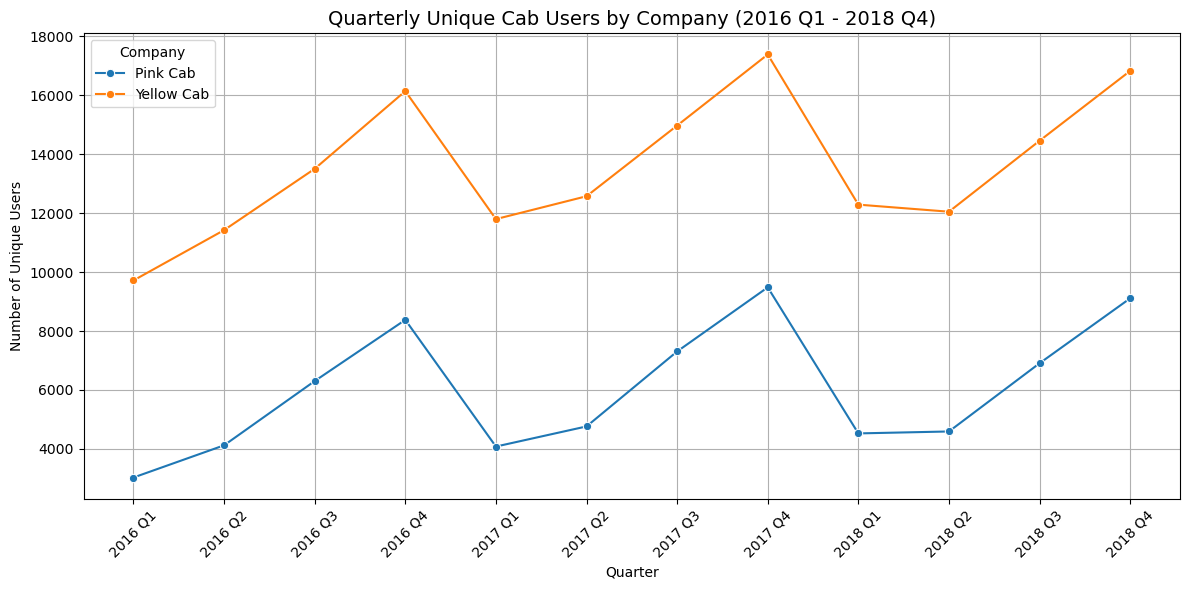

In [7]:
# Ensuring that 'Month' is properly formatted for display
monthly_users['Month'] = monthly_users['Month'].astype(str).apply(lambda x: x[:4] + ' Q' + x[5])

# Setting the plot style
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_users, x='Month', y='Unique Users', hue='Company', marker='o')

# plot format
plt.title('Quarterly Unique Cab Users by Company (2016 Q1 - 2018 Q4)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Number of Unique Users')
plt.tight_layout()
plt.grid(True)
plt.legend(title='Company')

plt.show()

✅ Insight from the Graph:
Yellow Cab consistently has more unique users per quarter compared to Pink Cab.

There's noticeable growth for both companies in certain quarters, but Yellow Cab always leads, confirming the earlier finding.

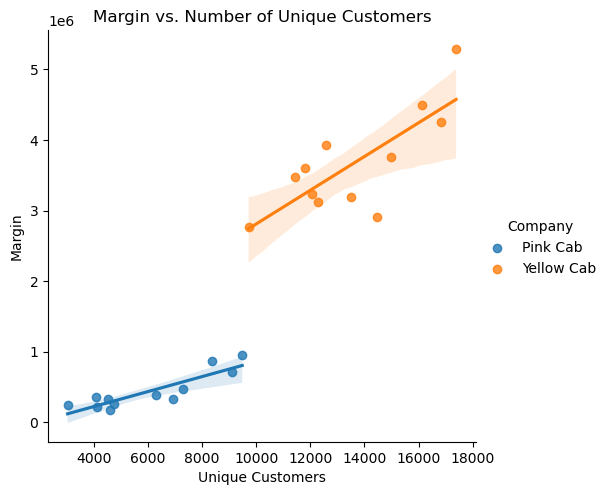

In [13]:
# defining Margin
transcab['Margin'] = transcab['Price Charged'] - transcab['Cost of Trip']

# grouping margin by company, month & unique customers
margin_customers = transcab.groupby(['Company','Month']).agg({'Customer ID' : pd.Series.nunique, 'Margin':'sum'}).reset_index().rename(columns = {'Customer ID': 'Unique Customers'})

#plotting the relationship
sns.lmplot(data=margin_customers, x='Unique Customers', y='Margin', hue='Company')
plt.title('Margin vs. Number of Unique Customers')
plt.show()

In [14]:
margin_customers[['Unique Customers', 'Margin']].corr()

,Unique Customers,Margin
Unique Customers,1.000000,0.937945
Margin,0.937945,1.000000


Insight: Relationship Between Unique Customers and Margin

Conclusion:Yes, the margin increases proportionally with the number of unique customers.

Evidence:
- The scatter plot with regression lines shows a strong positive linear trend for both Pink Cab and Yellow Cab.
- The correlation coefficient between Unique Customers and Margin is 0.938, which indicates a very strong positive correlation. This suggests that as the number of customers grows, the profit margin also increases consistently.

Implication:
- Customer growth directly contributes to revenue growth, reinforcing the importance of expanding the user base
- Yellow Cab, with more customers, generates significantly higher margins, indicating economies of scale or better pricing efficiency.

In [17]:
# merging customer_id and cab datasets!

cabcus = transcab.merge(cust)
cabcus.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Month,Margin,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,2016Q1,57.315,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,2016Q1,23.666,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,2016Q1,27.568,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,2016Q1,25.798,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,2016Q1,16.844,Male,33,8536


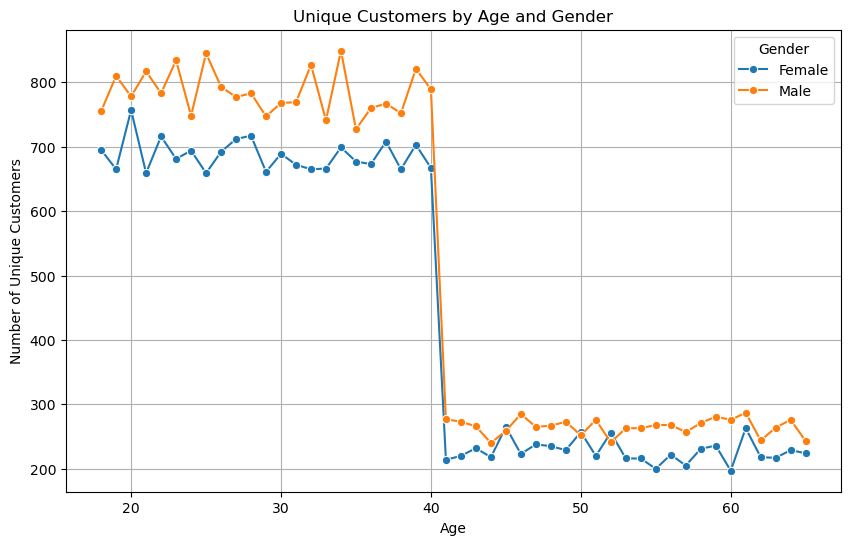

In [19]:
cseg = cabcus.groupby(['Age','Gender'])['Customer ID'].nunique().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=cseg, x='Age', y='Customer ID', hue='Gender', marker='o')
plt.title('Unique Customers by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Unique Customers')
plt.grid(True)
plt.show()

In [31]:
print("min income: ", cabcus['Income (USD/Month)'].min())
print("max income: ", cabcus['Income (USD/Month)'].max())

min income:  2000
max income:  35000


/tmp/ipykernel_9437/1973750650.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cab_inc = cabcus.groupby(['Income Bin', 'Company'])['Customer ID'].nunique().reset_index()


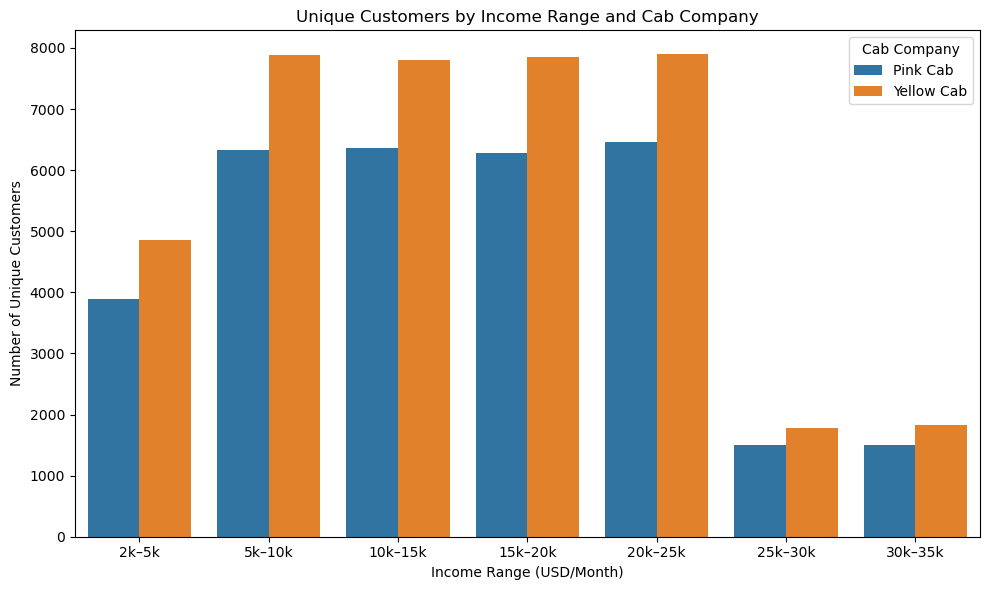

In [34]:
#plotting based on income range and preferred cab companies!

# defining income bins and labels
bins = [2000, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = ['2k–5k', '5k–10k', '10k–15k', '15k–20k', '20k–25k', '25k–30k', '30k–35k']

# creating the income bin column
cabcus['Income Bin'] = pd.cut(cabcus['Income (USD/Month)'], bins=bins, labels=labels, include_lowest=True)

# grouping by income bin and cab company
cab_inc = cabcus.groupby(['Income Bin', 'Company'])['Customer ID'].nunique().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=cab_inc, x='Income Bin', y='Customer ID', hue='Company')
plt.title('Unique Customers by Income Range and Cab Company')
plt.xlabel('Income Range (USD/Month)')
plt.ylabel('Number of Unique Customers')
plt.legend(title='Cab Company')
plt.tight_layout()
plt.show()

/tmp/ipykernel_9437/2569944276.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incgen = cabcus.groupby(['Income Bin', 'Gender'])['Customer ID'].nunique().reset_index()


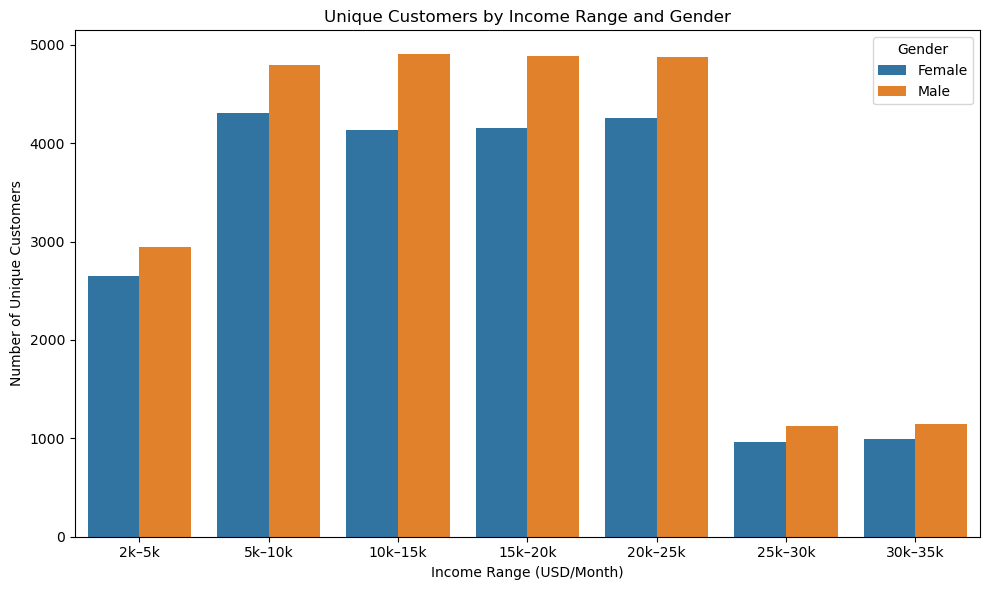

In [35]:
# plotting based on income range & gender!

# grouping by income bin and gender
incgen = cabcus.groupby(['Income Bin', 'Gender'])['Customer ID'].nunique().reset_index()

# plotting
plt.figure(figsize=(10,6))
sns.barplot(data=incgen, x='Income Bin', y='Customer ID', hue='Gender')
plt.title('Unique Customers by Income Range and Gender')
plt.xlabel('Income Range (USD/Month)')
plt.ylabel('Number of Unique Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Conclusion

**Key Insights:**
- Yellow Cab consistently has more unique users per quarter compared to Pink Cab, showing stronger market presence over time.
- There is a strong positive correlation (0.938) between the number of unique customers and margin for both companies, indicating that higher customer volume leads to higher profits.
- Most cab users fall in the 15–40 age group, with usage declining sharply after 40.
- Men use cab services more frequently than women.
- The dominant customer base earns between 2k- 25k USD/month, with fewer high-income users (less than 25k USD/month).
- Yellow Cab is the preferred option across all income brackets.

**Recommendations:**
- Prioritize investment in Yellow Cab due to its larger and more consistent user base and higher profit margins.
- Focus marketing strategies on the 15–40 age segment and mid-income groups (5k–25k USD/month), which make up the bulk of users.
- Explore how Yellow Cab maintains broader appeal across demographics and apply similar tactics to improve Pink Cab’s positioning.
- Leverage the strong customer-margin relationship by investing in customer acquisition to drive profitability.